In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/content/cleaned_dataset_flight.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473963 entries, 0 to 473962
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DayOfWeek          473963 non-null  object 
 1   Date               473963 non-null  object 
 2   DepTime            473963 non-null  object 
 3   ArrTime            473963 non-null  object 
 4   CRSArrTime         473963 non-null  object 
 5   UniqueCarrier      473963 non-null  object 
 6   Airline            473963 non-null  object 
 7   FlightNum          473962 non-null  float64
 8   TailNum            473962 non-null  object 
 9   ActualElapsedTime  473962 non-null  object 
 10  CRSElapsedTime     473962 non-null  object 
 11  AirTime            473962 non-null  object 
 12  ArrDelay           473962 non-null  float64
 13  DepDelay           473962 non-null  float64
 14  Origin             473962 non-null  object 
 15  Org_Airport        473962 non-null  object 
 16  De

In [4]:
df.head()

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Month,Route
0,Thursday,2019-01-03,18:29,19:59,19:25,WN,Southwest Airlines Co.,3920.0,N464WN,01:30,...,0.0,N,0.0,2.0,0.0,0.0,0.0,32.0,1.0,IND-BWI
1,Thursday,2019-01-03,19:37,20:37,19:40,WN,Southwest Airlines Co.,509.0,N763SW,04:00,...,0.0,N,0.0,10.0,0.0,0.0,0.0,47.0,1.0,IND-LAS
2,Thursday,2019-01-03,16:44,18:45,17:25,WN,Southwest Airlines Co.,1333.0,N334SW,02:01,...,0.0,N,0.0,8.0,0.0,0.0,0.0,72.0,1.0,IND-MCO
3,Thursday,2019-01-03,14:52,16:40,16:25,WN,Southwest Airlines Co.,675.0,N286WN,03:48,...,0.0,N,0.0,3.0,0.0,0.0,0.0,12.0,1.0,IND-PHX
4,Thursday,2019-01-03,13:23,15:26,15:10,WN,Southwest Airlines Co.,4.0,N674AA,02:03,...,0.0,N,0.0,0.0,0.0,0.0,0.0,16.0,1.0,IND-TPA


In [6]:
df.isnull().sum()

,0
DayOfWeek,0
Date,0
DepTime,0
ArrTime,0
CRSArrTime,0
UniqueCarrier,0
Airline,0
FlightNum,1
TailNum,1
ActualElapsedTime,1


In [8]:
df.dropna(inplace=True)
df.isnull().sum()

,0
DayOfWeek,0
Date,0
DepTime,0
ArrTime,0
CRSArrTime,0
UniqueCarrier,0
Airline,0
FlightNum,0
TailNum,0
ActualElapsedTime,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
#importing all the packages required for Univariate and Bivariate Visual Analysis
import matplotlib.pyplot as plt
import seaborn as sns

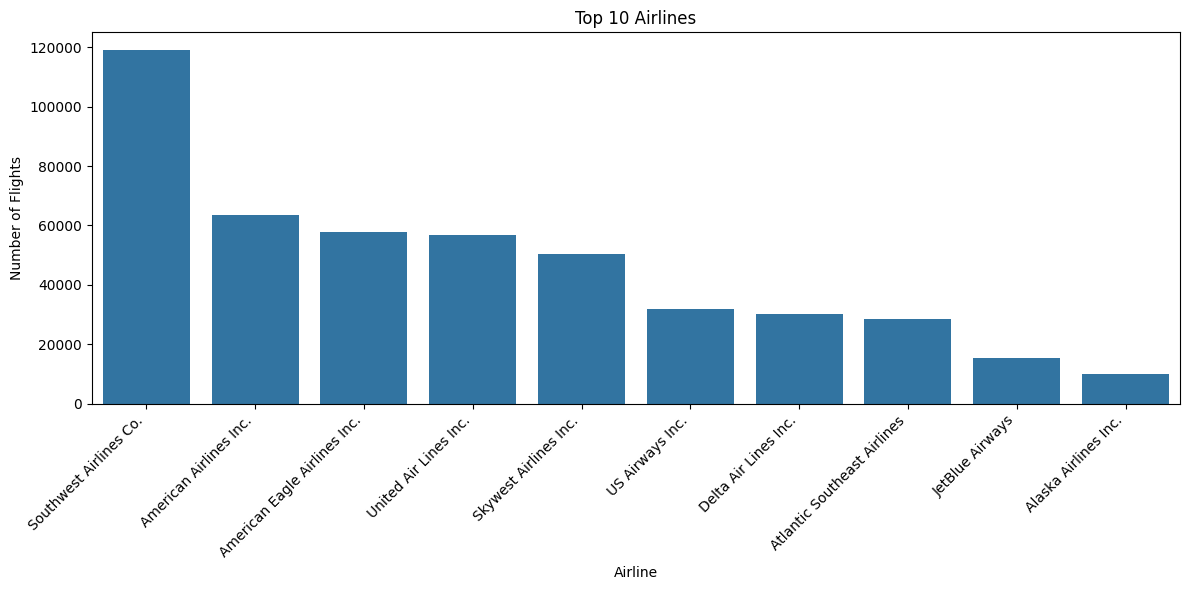

In [11]:
#finding the top 10 airlines using the barplot
top_10_airlines = df['Airline'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_airlines.index, y=top_10_airlines.values)
plt.title('Top 10 Airlines')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

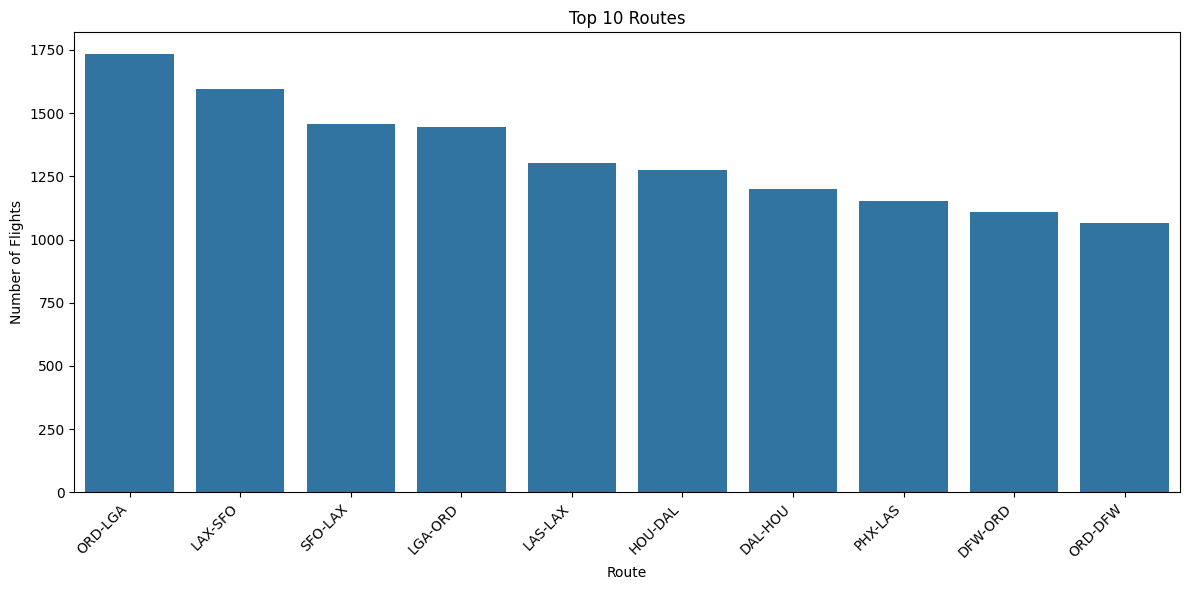

In [12]:
#finding the top 10 Routes using the barplot
top_10_routes = df['Route'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_routes.index, y=top_10_routes.values)
plt.title('Top 10 Routes')
plt.xlabel('Route')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

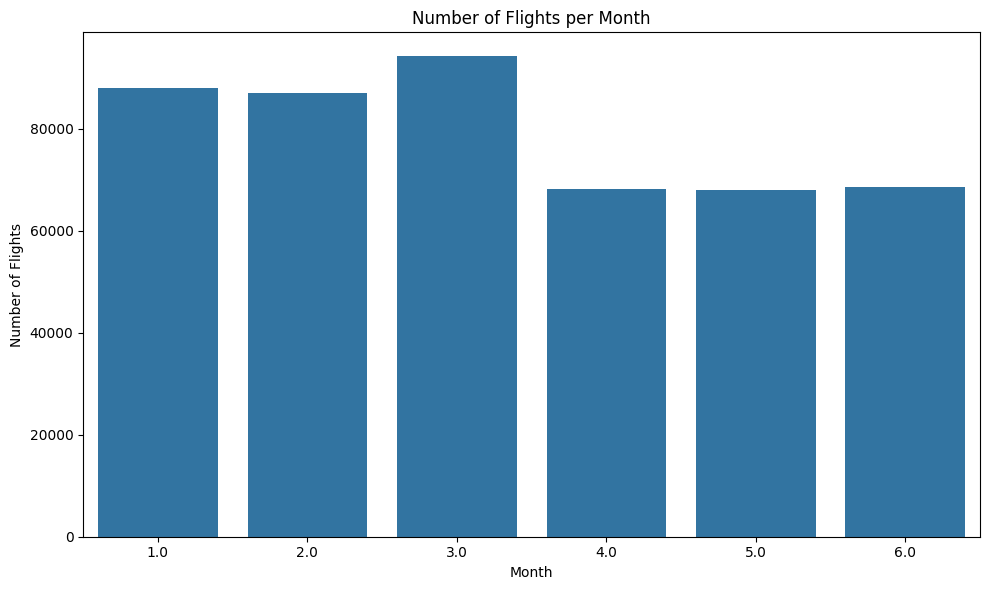

In [15]:
busiest_months = df['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=busiest_months.index, y=busiest_months.values)
plt.title('Number of Flights per Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

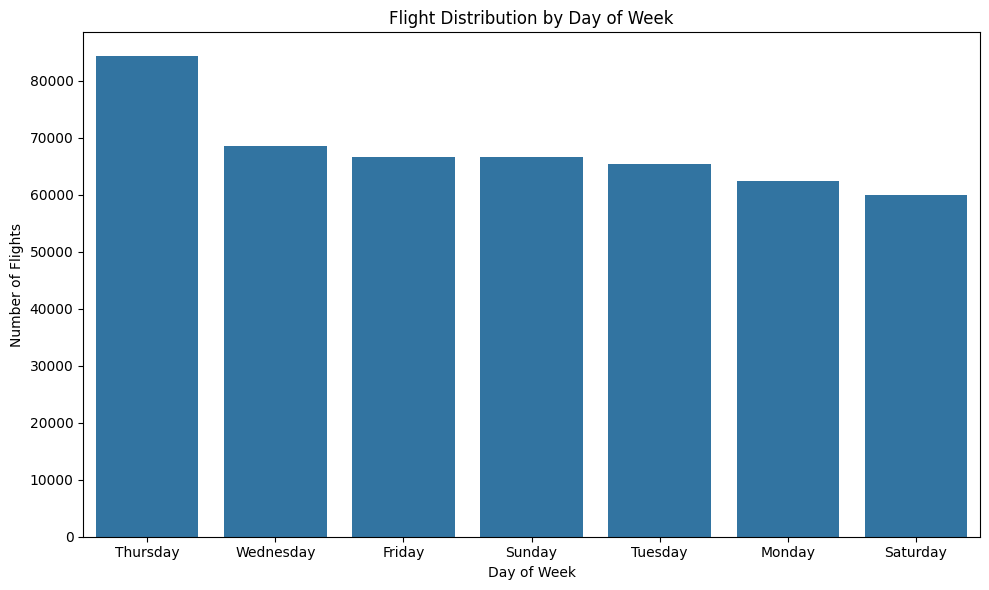

In [18]:
#flight distribution by day of week countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=df, order=df['DayOfWeek'].value_counts().index)
plt.title('Flight Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Flights')
plt.tight_layout()
plt.show()

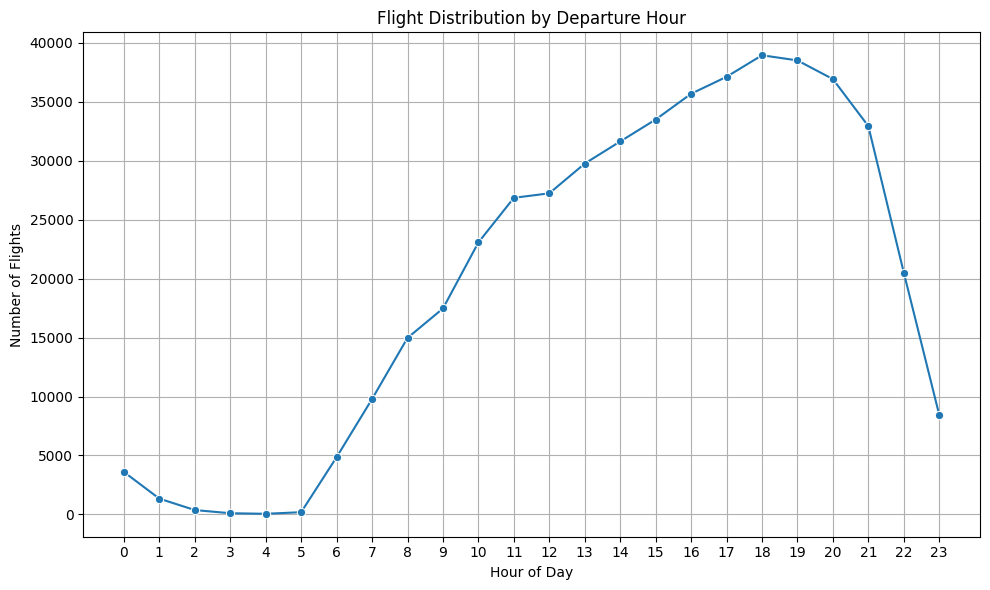

In [22]:
# Convert time columns to datetime objects
# Use errors='coerce' to handle any parsing errors by setting them to NaT (Not a Time)
df['DepTime_datetime'] = pd.to_datetime(df['DepTime'], format='%H:%M', errors='coerce')
df['ArrTime_datetime'] = pd.to_datetime(df['ArrTime'], format='%H:%M', errors='coerce')

# Extract the hour from the datetime objects
df['DepHour'] = df['DepTime_datetime'].dt.hour
df['ArrHour'] = df['ArrTime_datetime'].dt.hour

# Calculate flight counts per departure hour
dep_hour_counts = df['DepHour'].value_counts().sort_index()

# Plot distribution of flights by departure hour using a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=dep_hour_counts.index, y=dep_hour_counts.values,marker="o")
plt.title('Flight Distribution by Departure Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Flights')
plt.xticks(dep_hour_counts.index) # Ensure all hours are shown on the x-axis
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plot

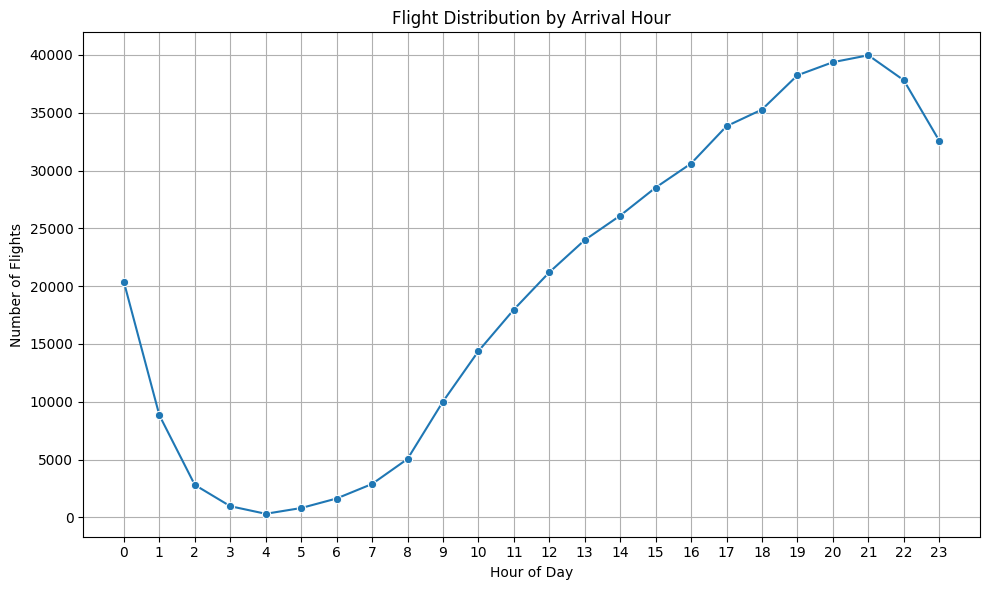

In [23]:
# Calculate flight counts per arrival hour
arr_hour_counts = df['ArrHour'].value_counts().sort_index()

# Plot distribution of flights by arrival hour using a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=arr_hour_counts.index, y=arr_hour_counts.values,marker="o")
plt.title('Flight Distribution by Arrival Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Flights')
plt.xticks(arr_hour_counts.index) # Ensure all hours are shown on the x-axis
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plot

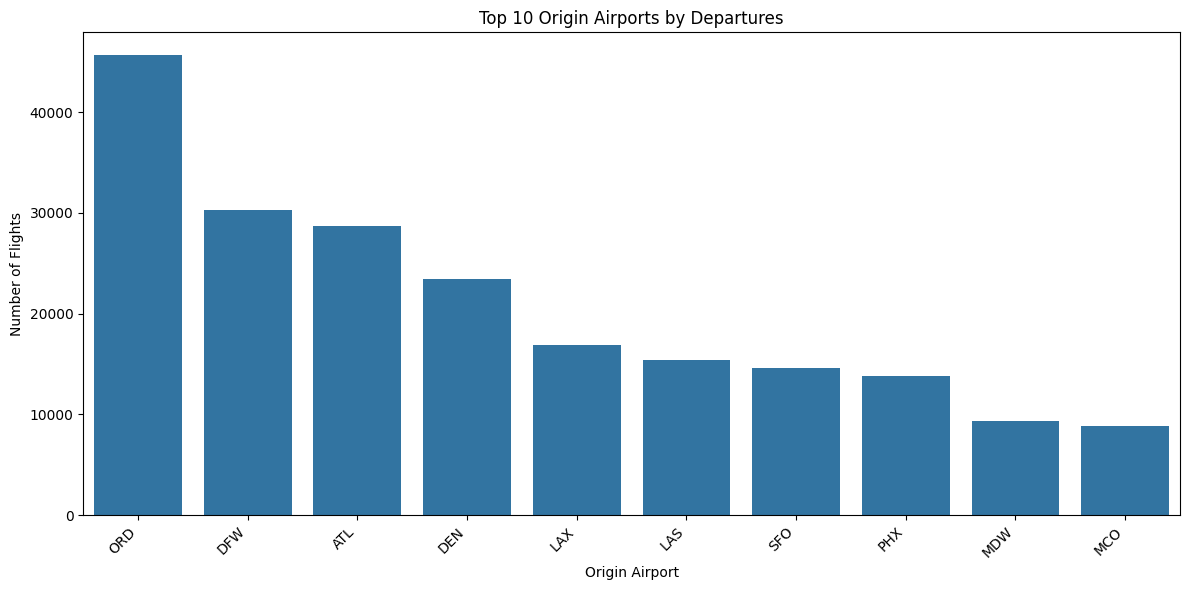

In [28]:
# Calculate flight counts per origin airport
origin_airport_counts = df['Origin'].value_counts().nlargest(10)

# Plot distribution of flights by origin airport
plt.figure(figsize=(12, 6))
sns.barplot(x=origin_airport_counts.index, y=origin_airport_counts.values)
plt.title('Top 10 Origin Airports by Departures')
plt.xlabel('Origin Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

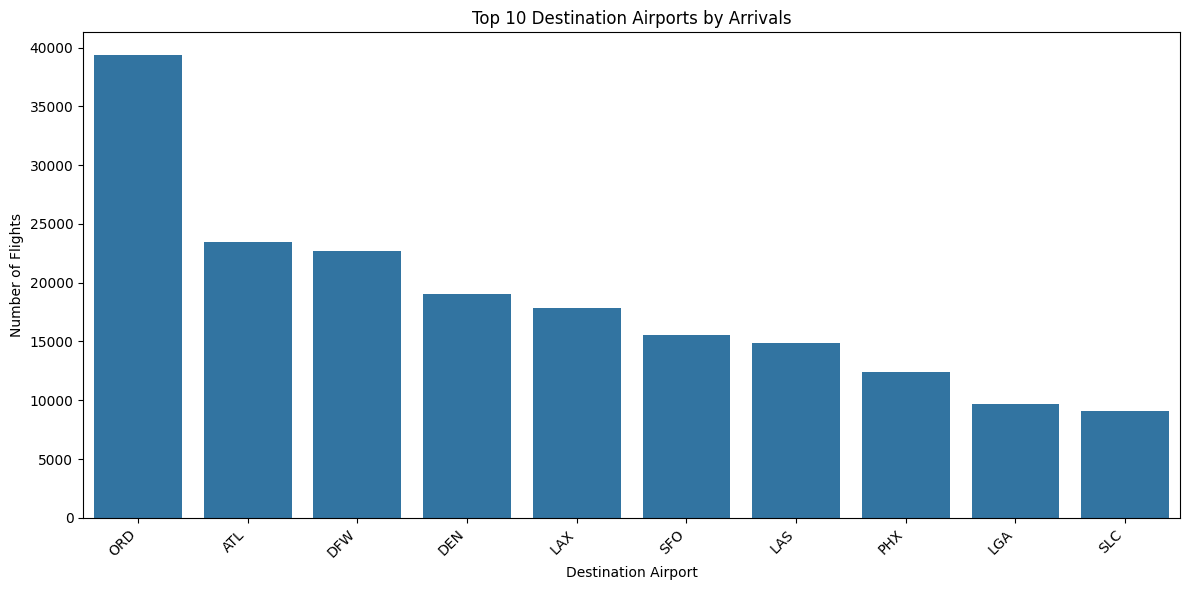

In [27]:
# Calculate flight counts per destination airport
dest_airport_counts = df['Dest'].value_counts().nlargest(10)

# Plot distribution of flights by destination airport
plt.figure(figsize=(12, 6))
sns.barplot(x=dest_airport_counts.index, y=dest_airport_counts.values)
plt.title('Top 10 Destination Airports by Arrivals')
plt.xlabel('Destination Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Task
Perform univariate and bivariate visual analysis on the dataset, including plotting bar charts, histograms, boxplots, and line plots as appropriate for different feature types and relationships.

## Univariate analysis - categorical features

### Subtask:
Create bar charts or count plots for categorical features to visualize the frequency distribution of each category.


**Reasoning**:
I will create a bar chart for the distribution of the `CancellationCode` column to visualize the frequency of each cancellation code.



## Univariate analysis - numerical features

### Subtask:
Create histograms and box plots for numerical features to visualize their distribution, central tendency, and spread.


**Reasoning**:
Identify the numerical columns and create histograms and box plots for each to visualize their distributions and spread.



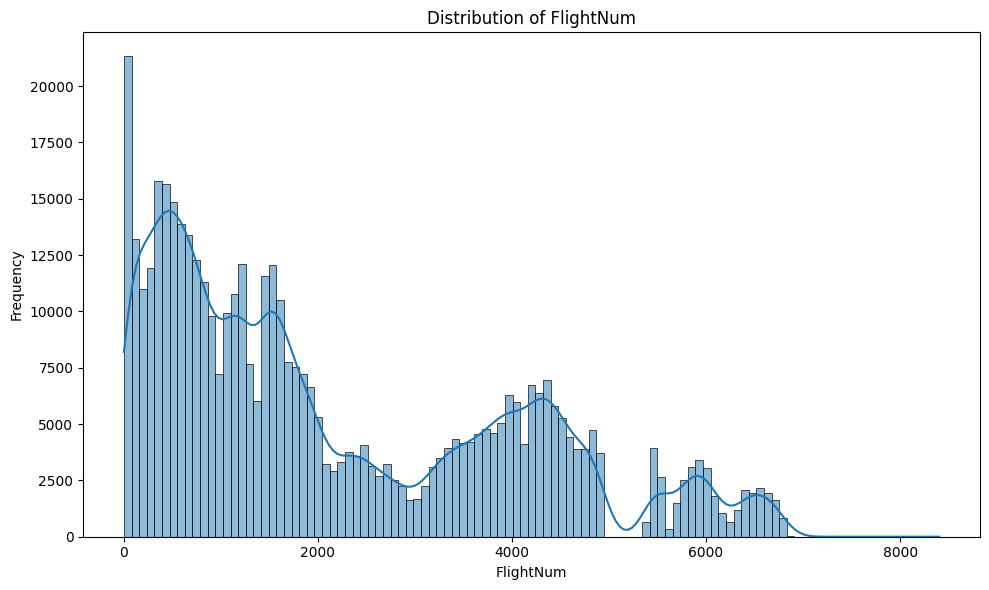

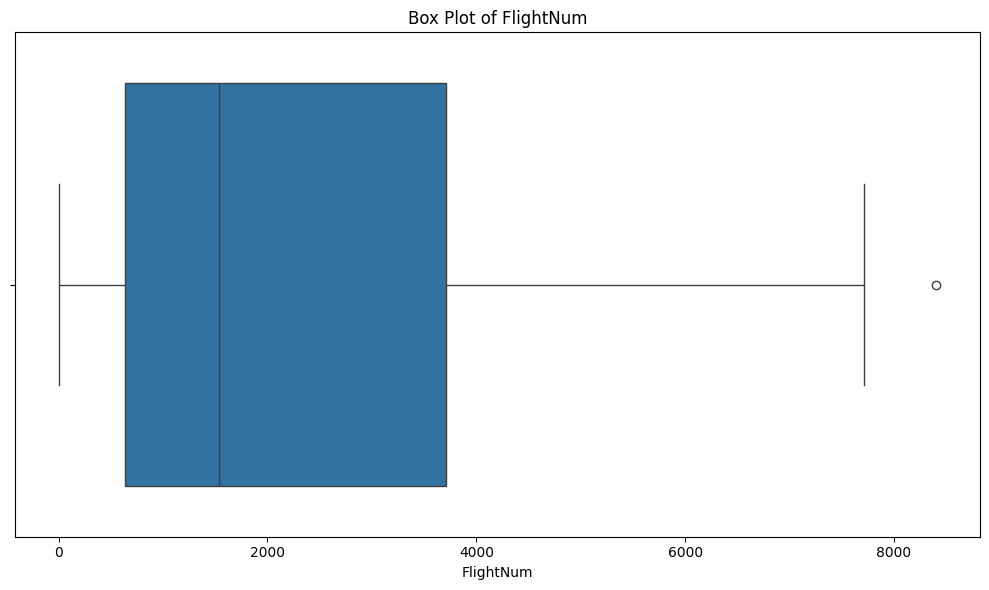

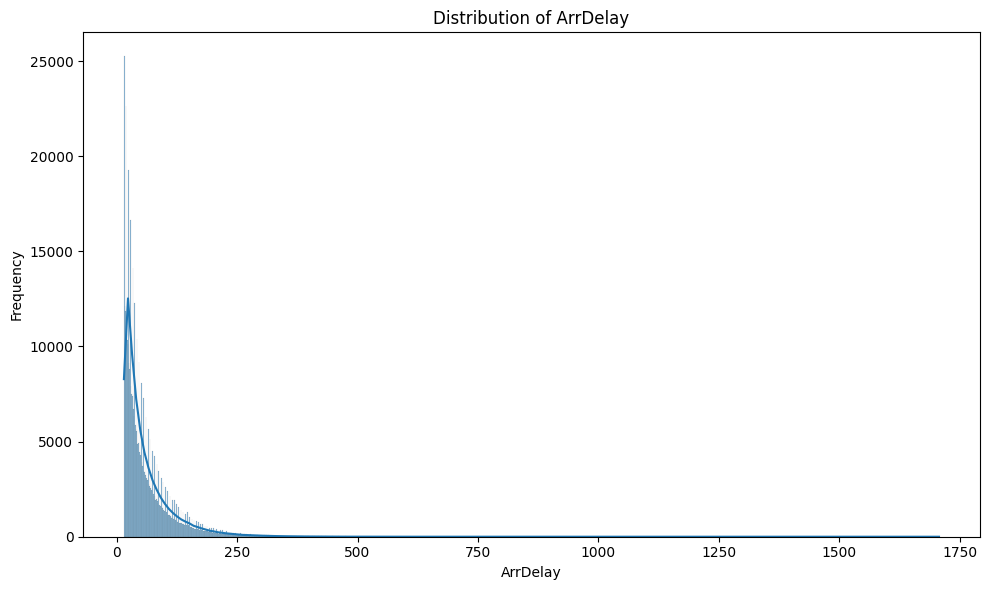

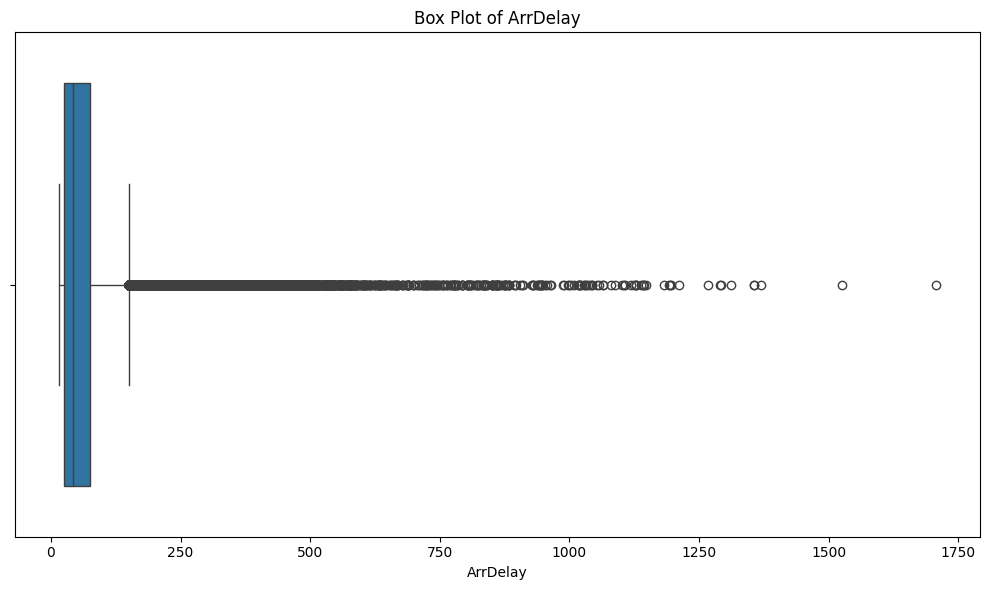

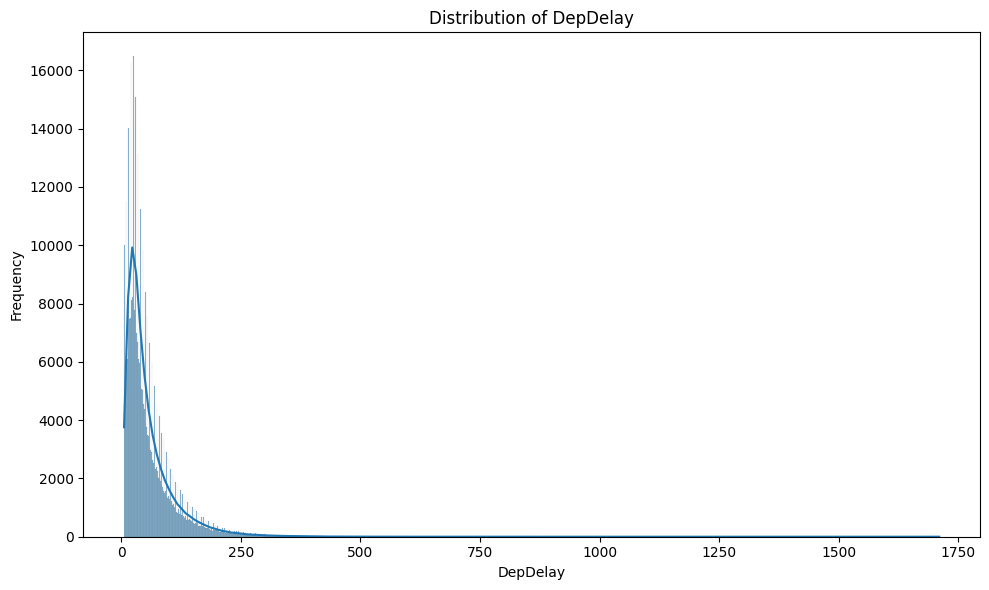

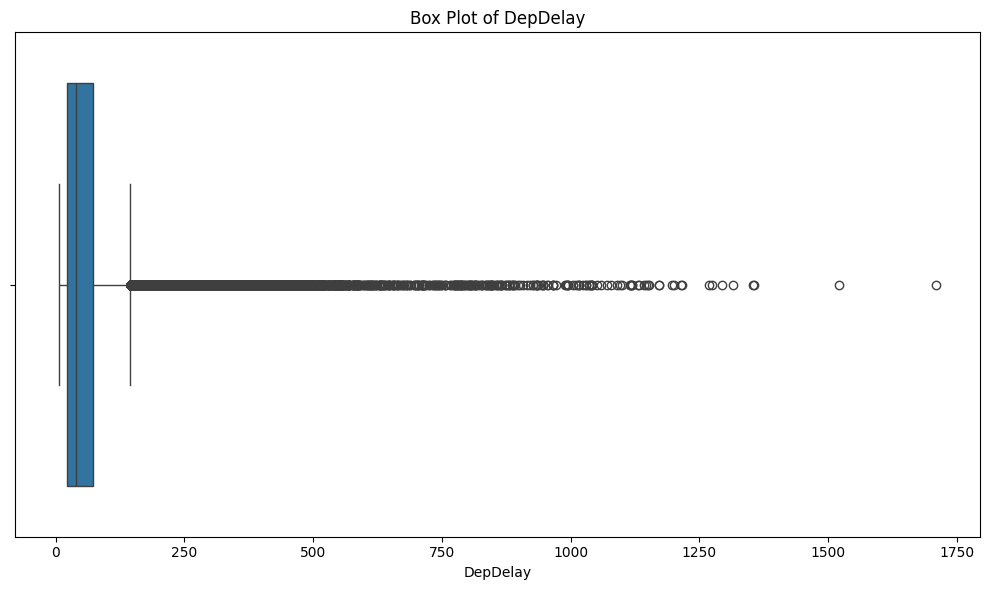

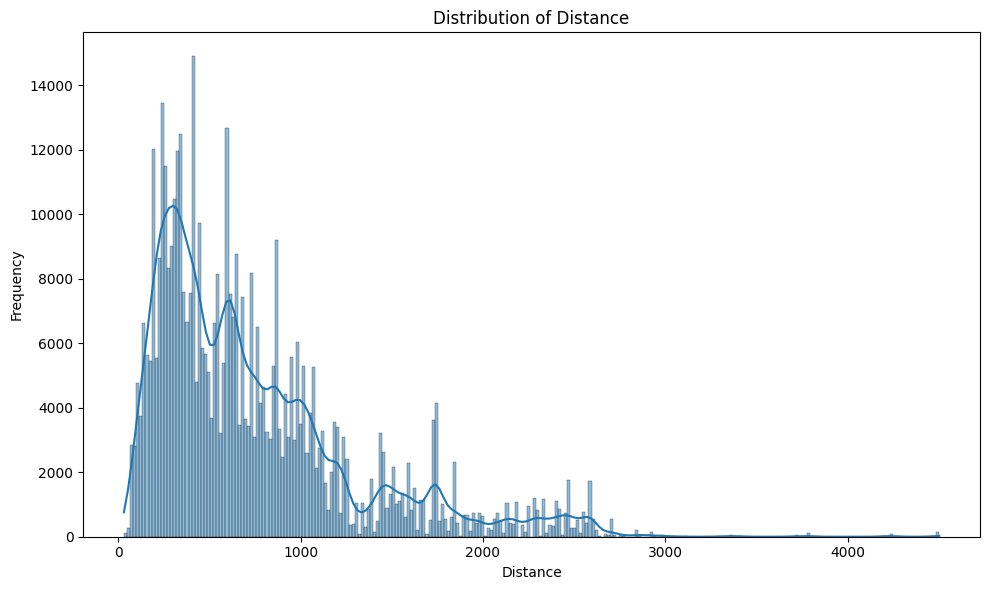

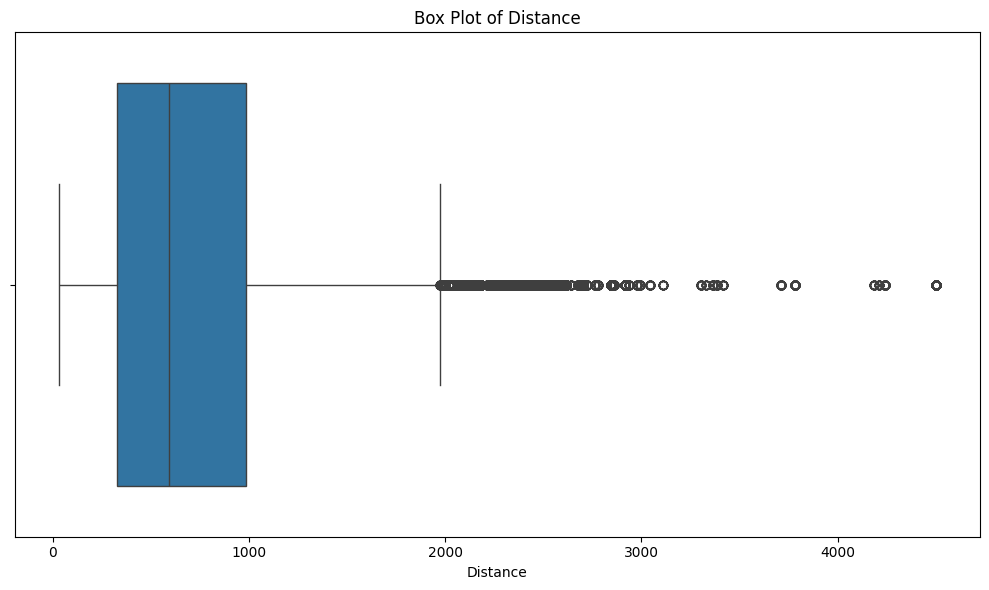

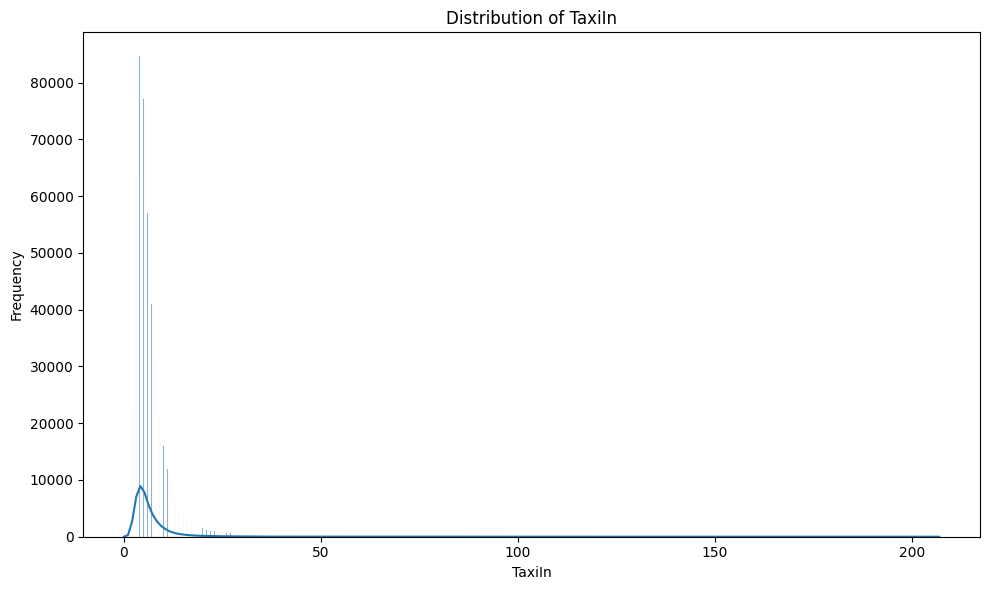

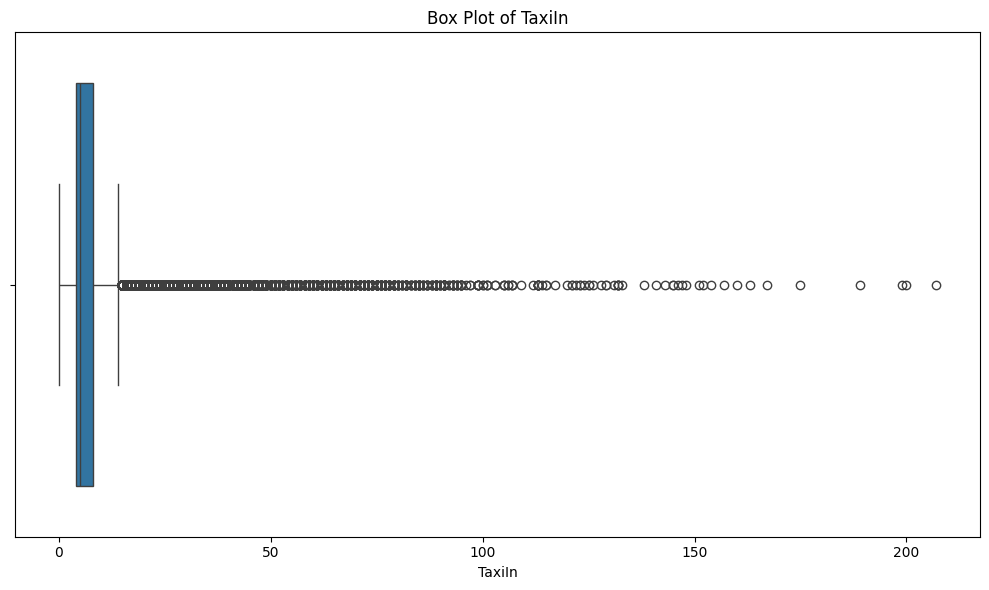

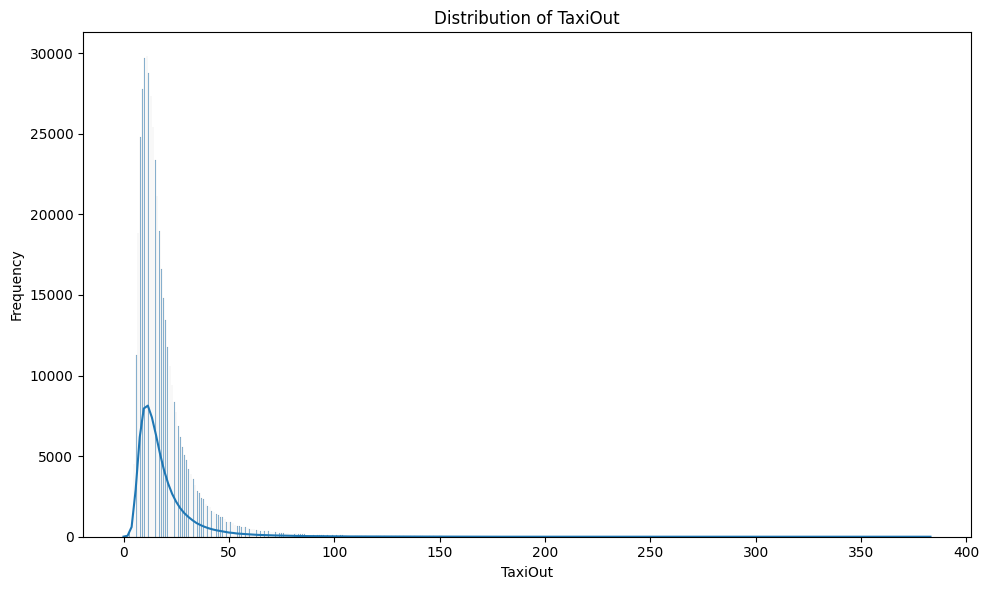

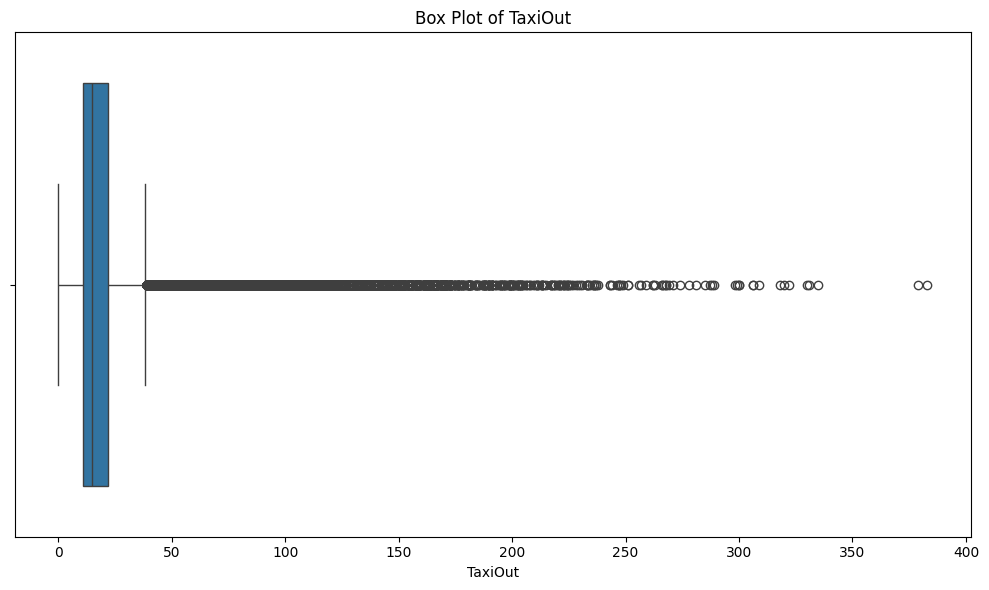

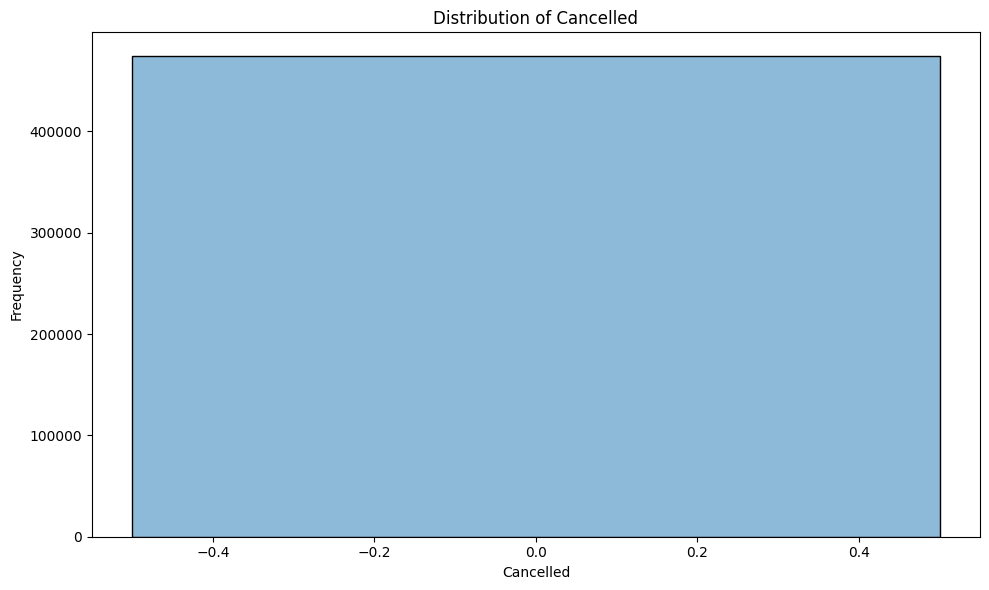

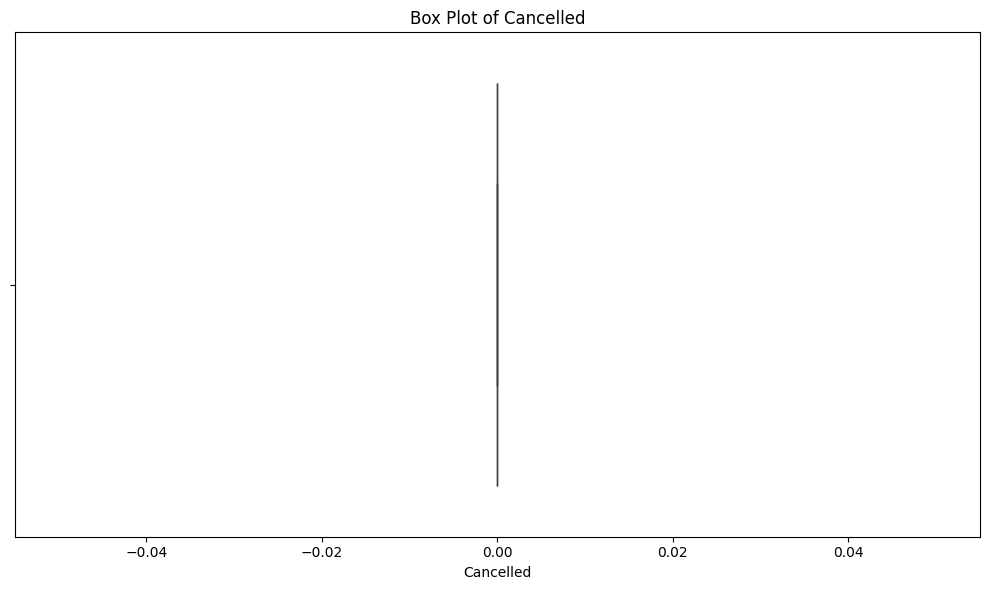

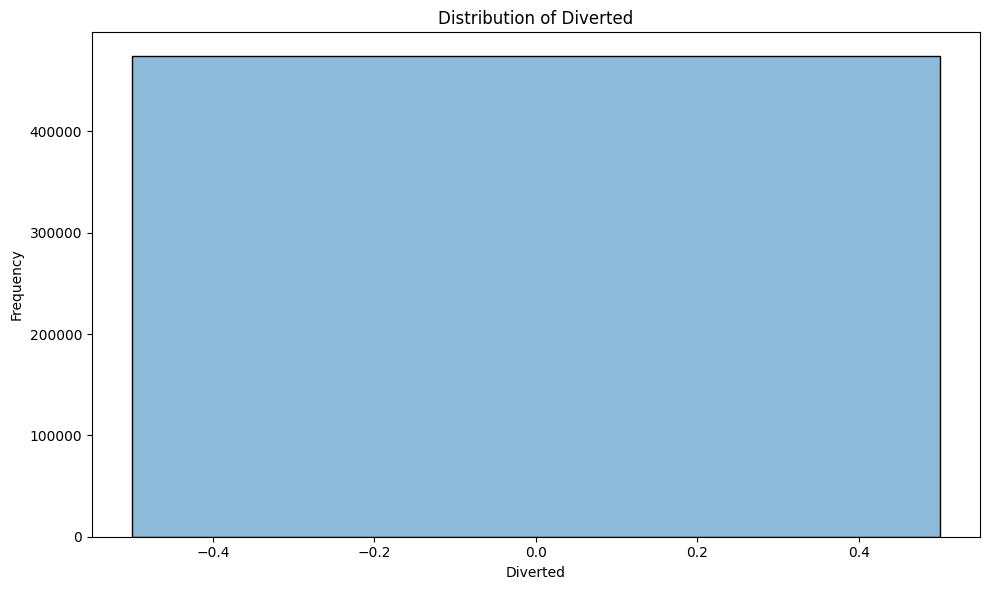

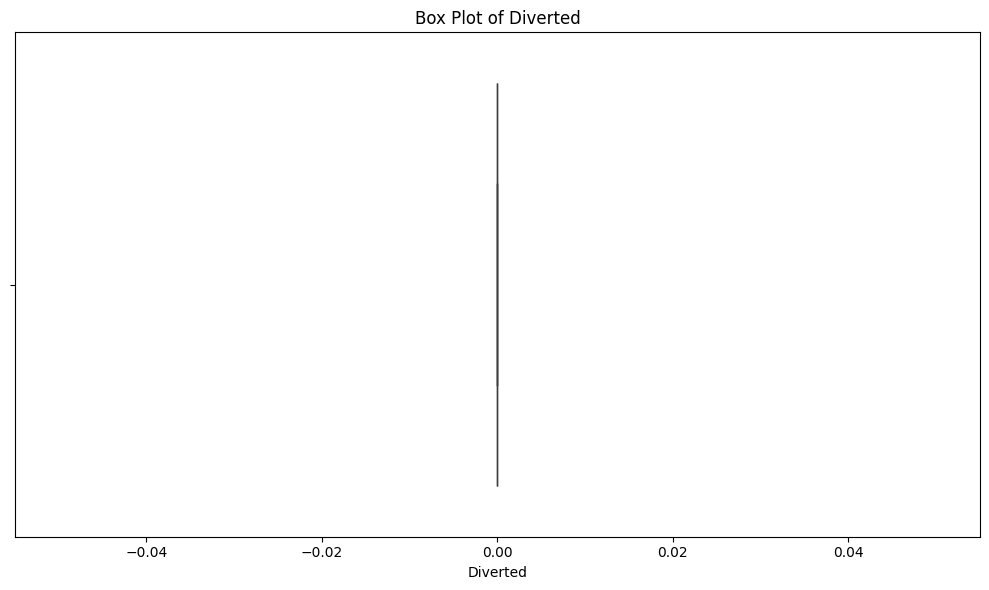

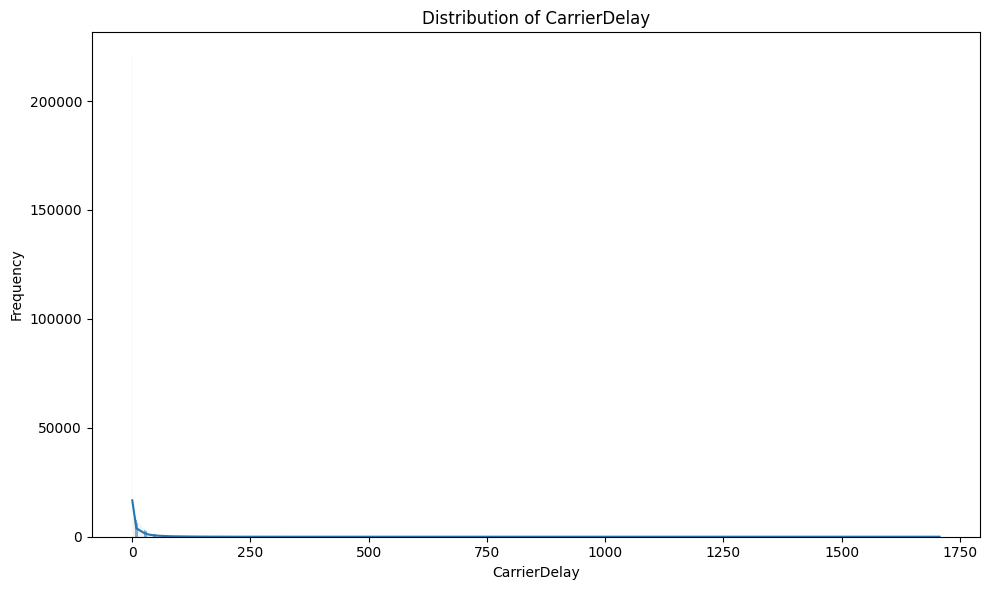

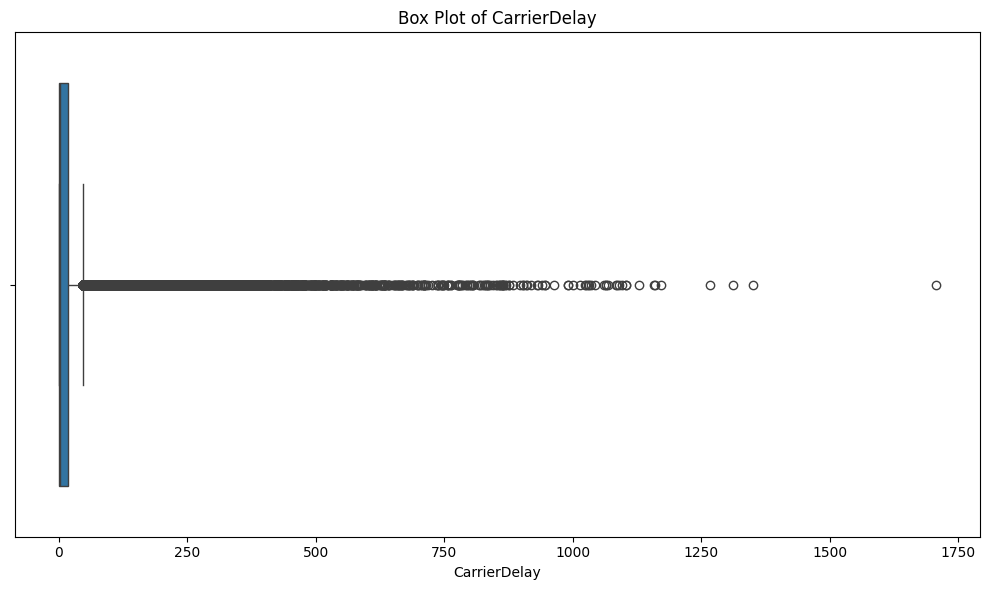

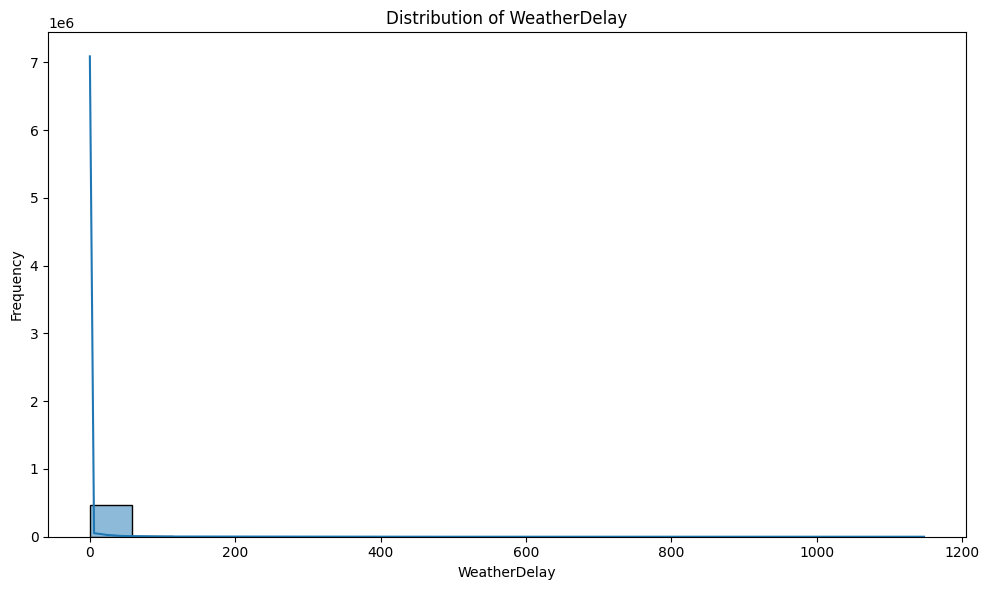

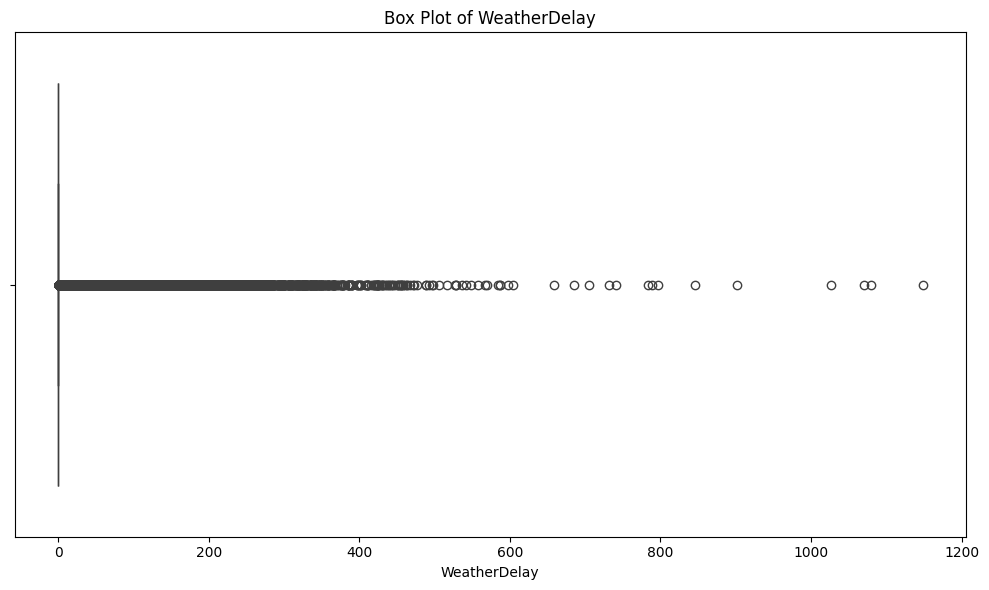

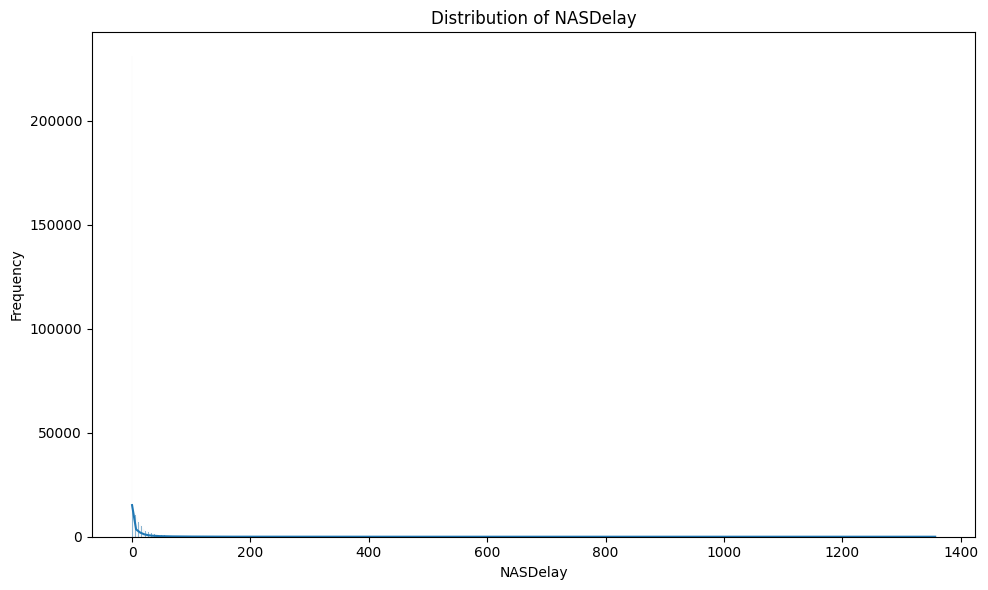

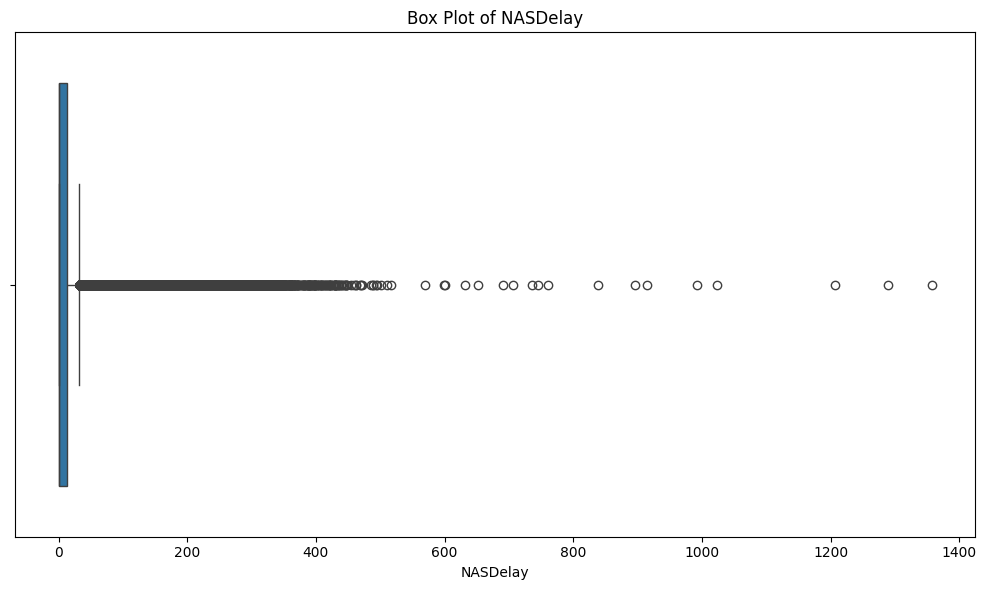

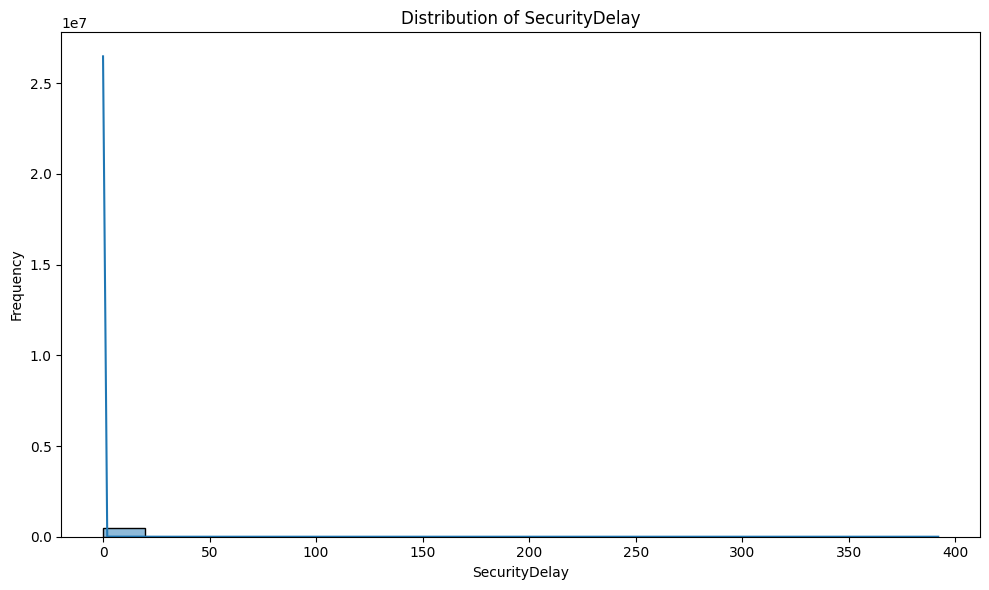

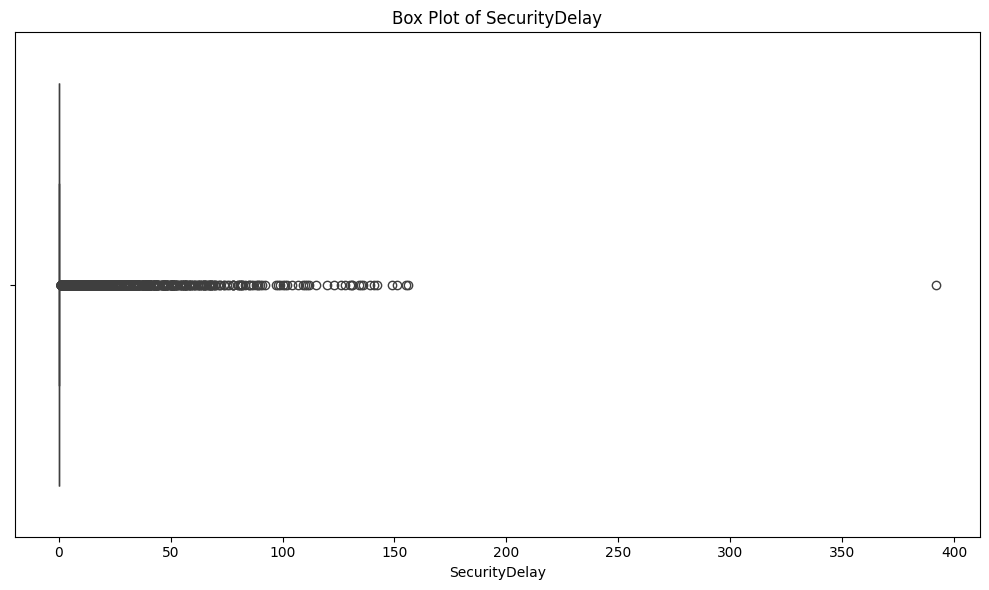

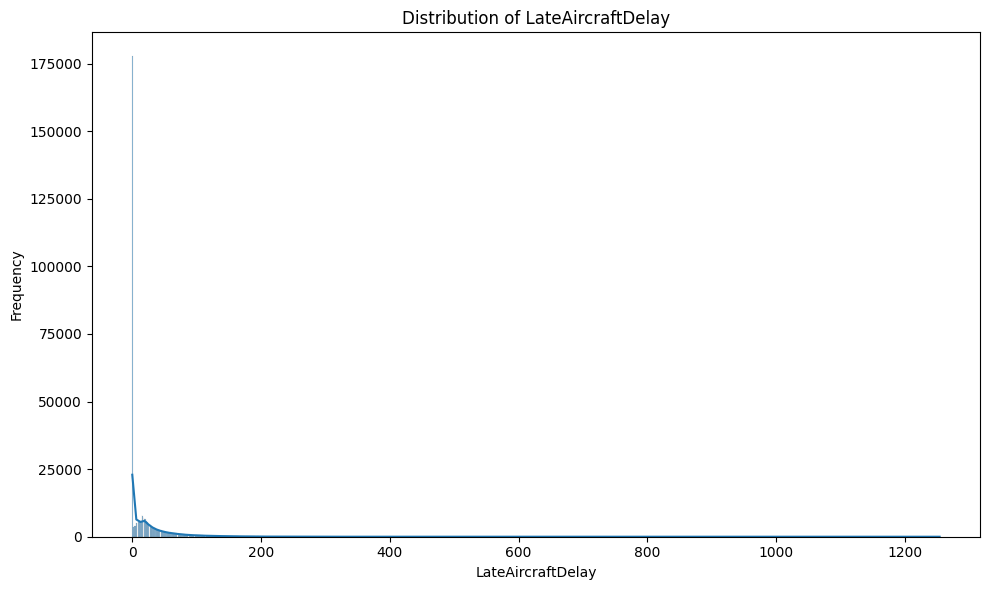

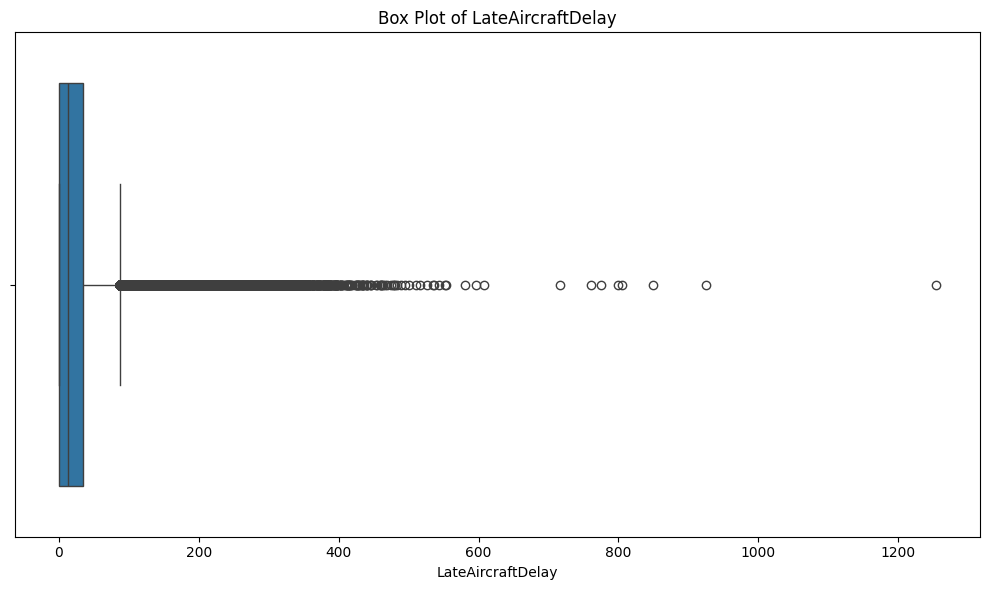

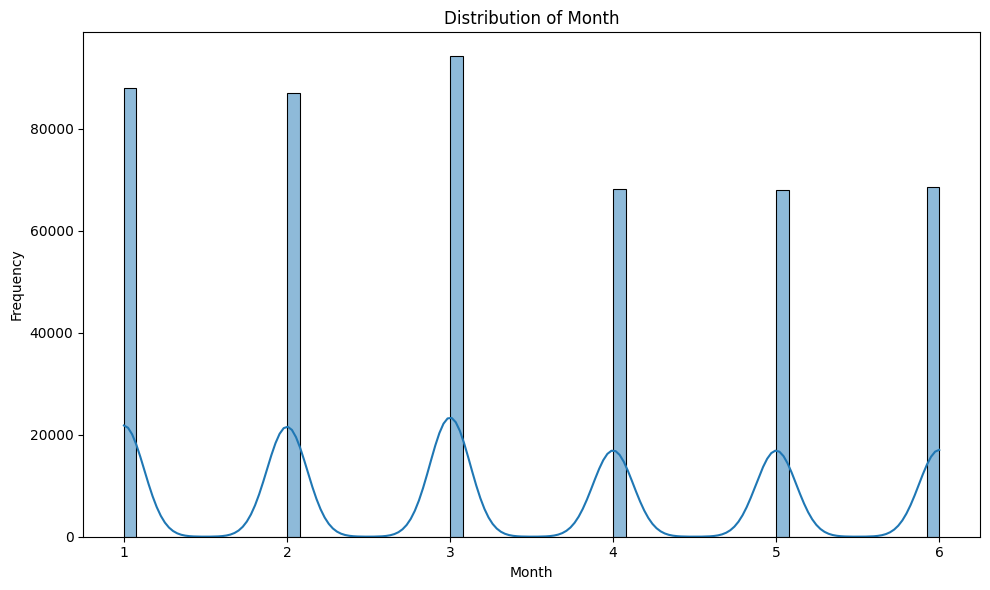

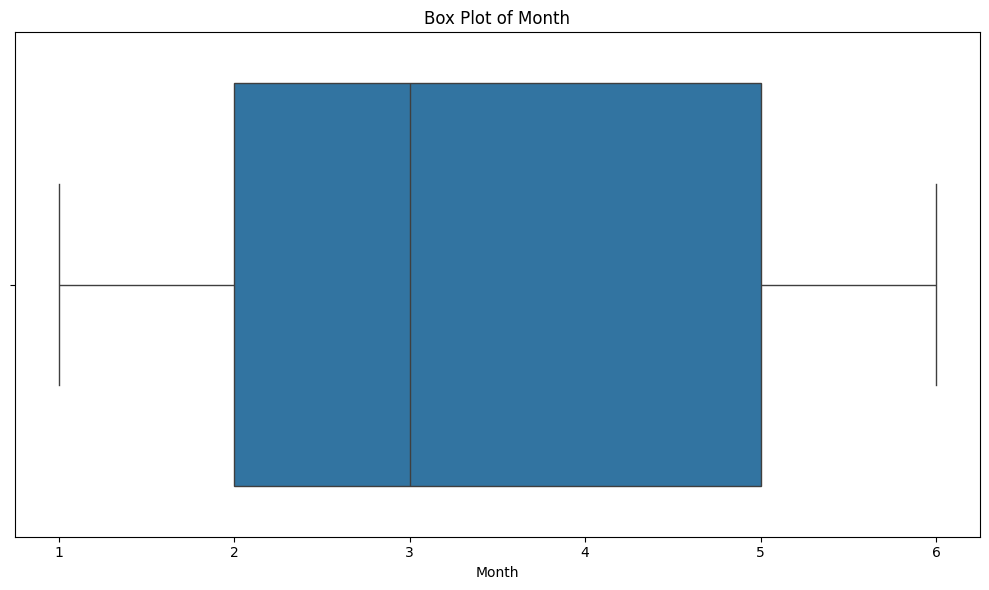

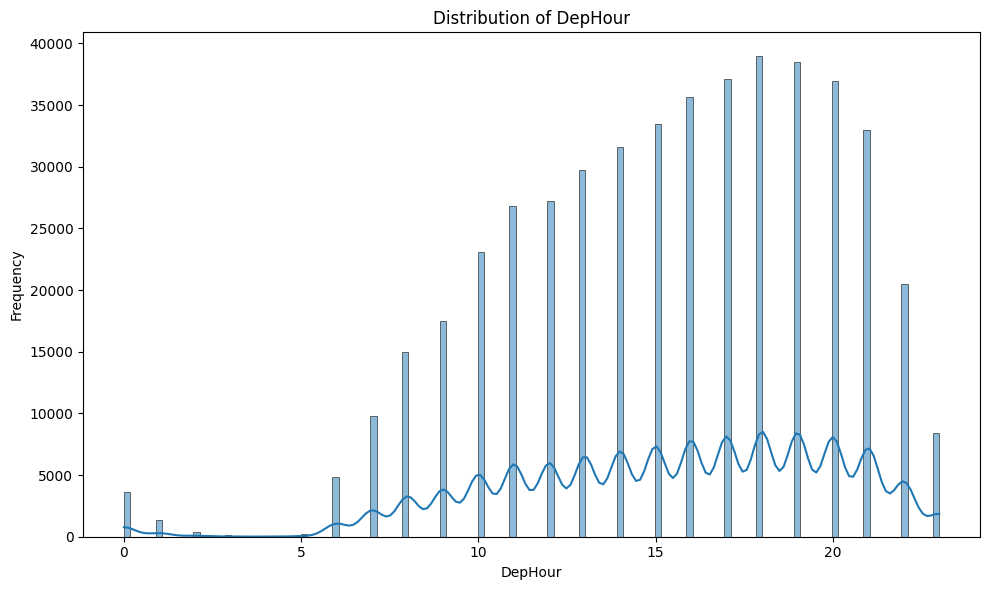

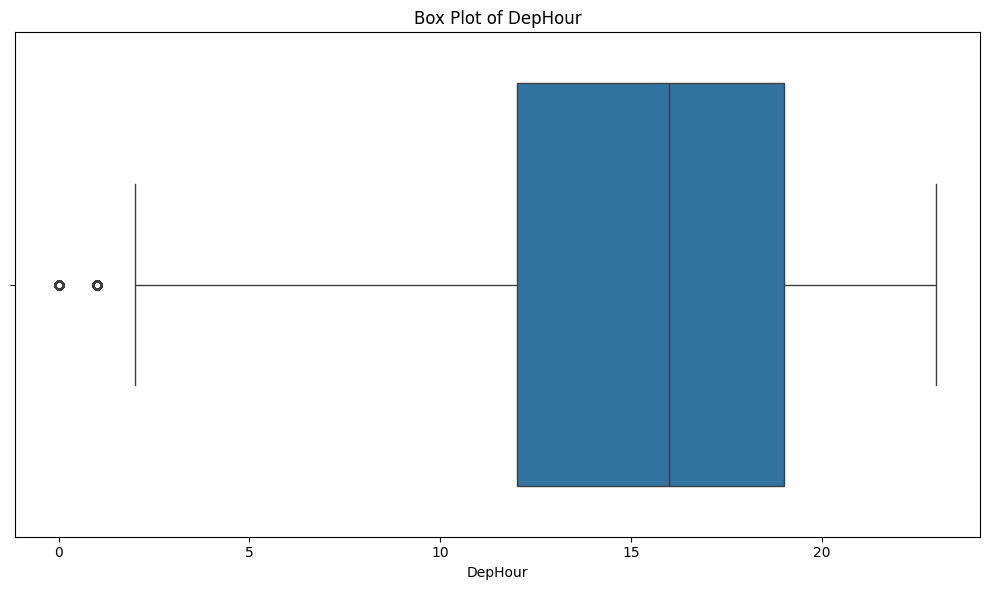

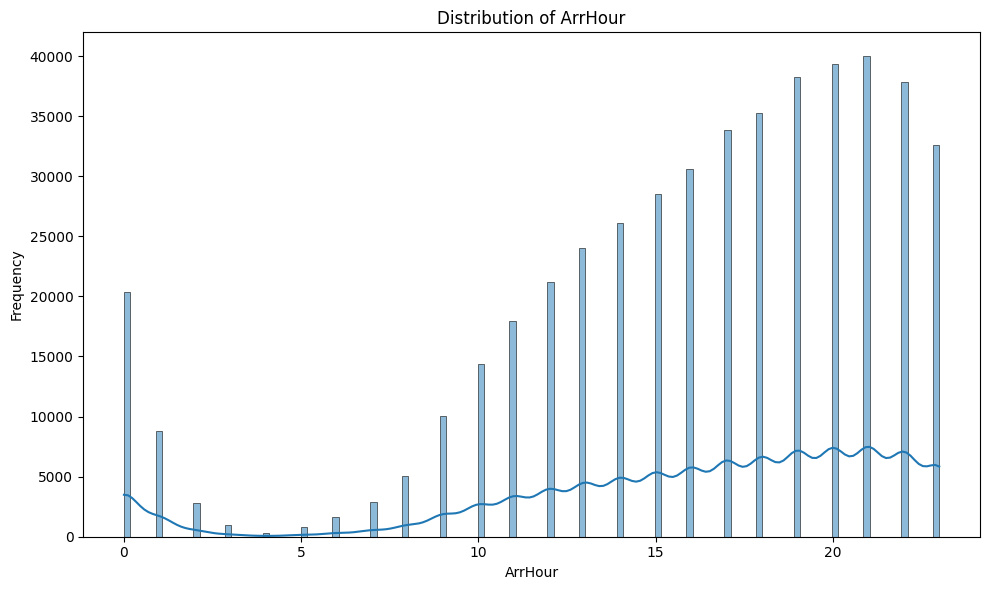

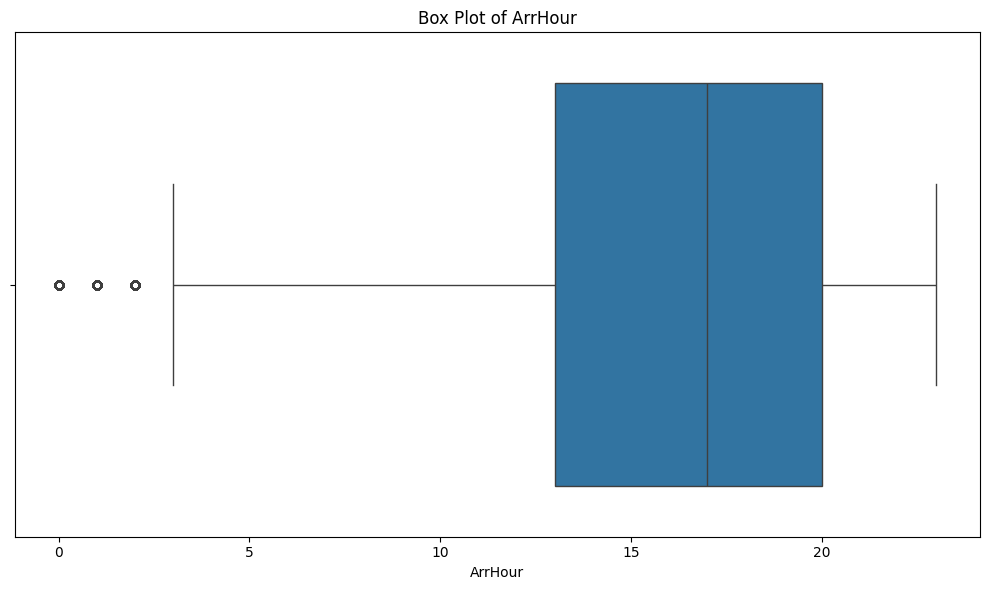

In [30]:
numerical_cols = ['FlightNum', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Month', 'DepHour', 'ArrHour']

for col in numerical_cols:
    # Create histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Create box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

## Bivariate analysis - categorical vs. categorical

### Subtask:
Create grouped bar charts or heatmaps to explore the relationship between two categorical features.


**Reasoning**:
Explore the relationship between 'DayOfWeek' and 'CancellationCode' using a grouped bar chart since 'CancellationCode' has a small number of unique values.



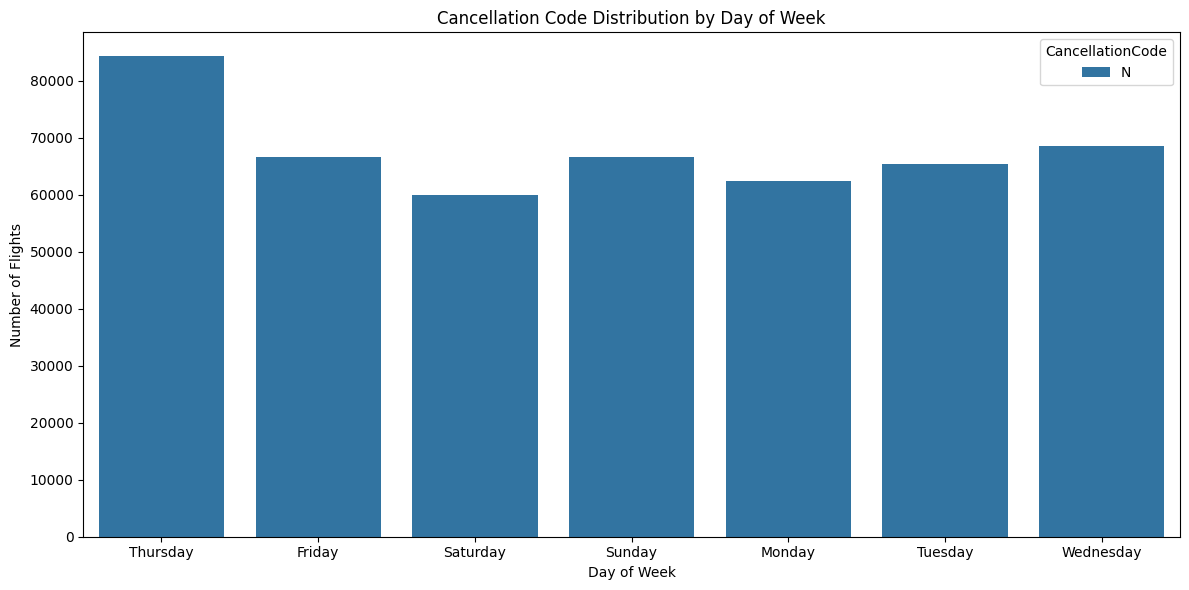

In [31]:
# Explore the relationship between 'DayOfWeek' and 'CancellationCode'
plt.figure(figsize=(12, 6))
sns.countplot(x='DayOfWeek', hue='CancellationCode', data=df)
plt.title('Cancellation Code Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Flights')
plt.tight_layout()
plt.show()

**Reasoning**:
Explore the relationship between 'Month' and 'CancellationCode' using a grouped bar chart since 'CancellationCode' has a small number of unique values.



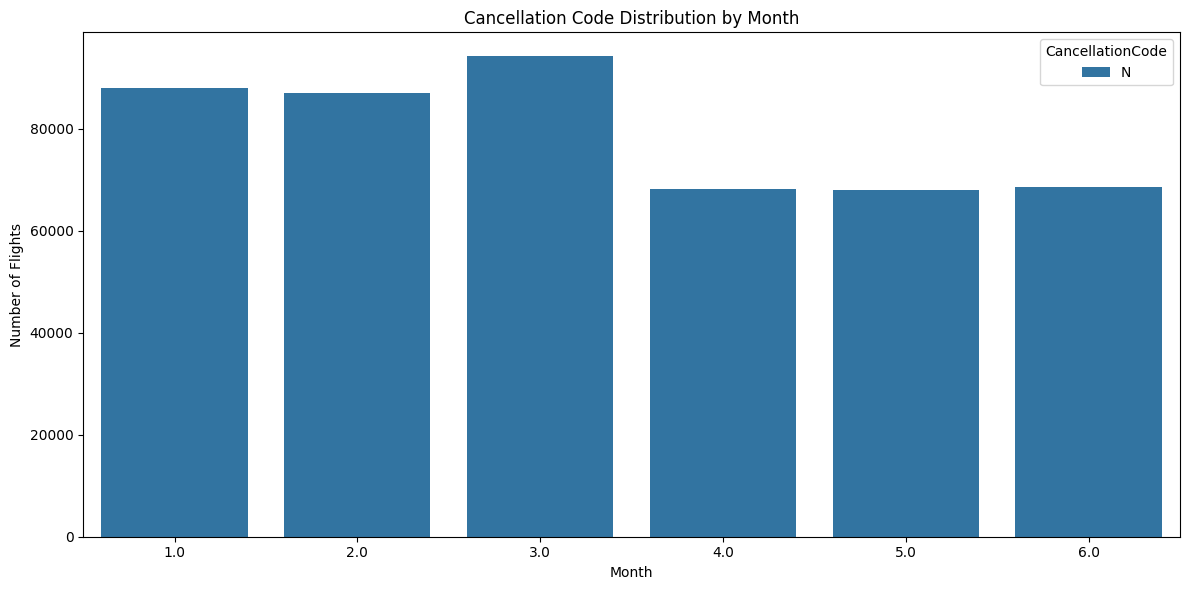

In [32]:
# Explore the relationship between 'Month' and 'CancellationCode'
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='CancellationCode', data=df)
plt.title('Cancellation Code Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.tight_layout()
plt.show()

## Bivariate analysis - numerical vs. numerical

### Subtask:
Create scatter plots or line plots to explore the relationship between two numerical features.


**Reasoning**:
Create scatter plots to visualize the relationship between the specified numerical features.



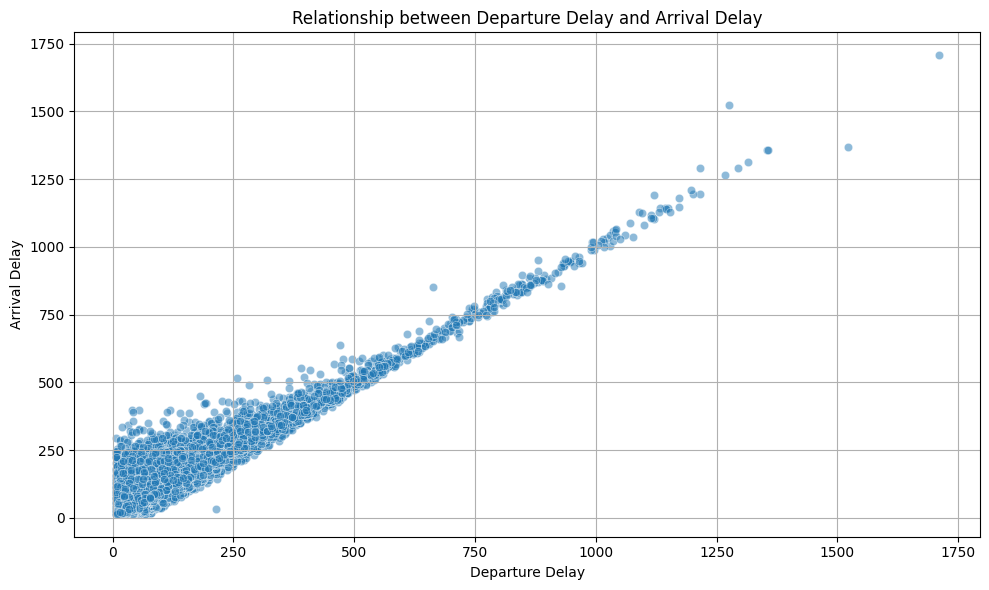

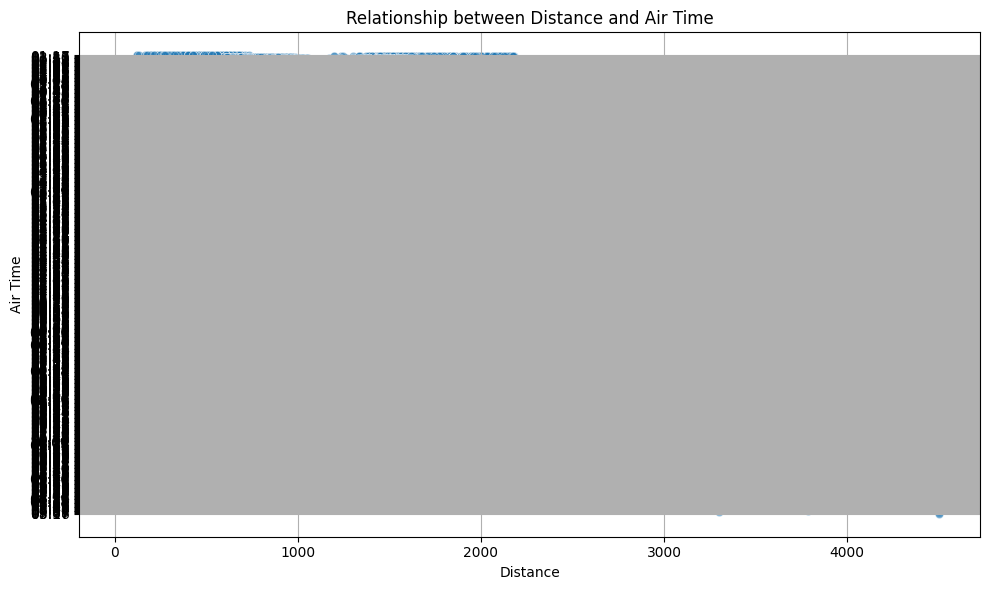

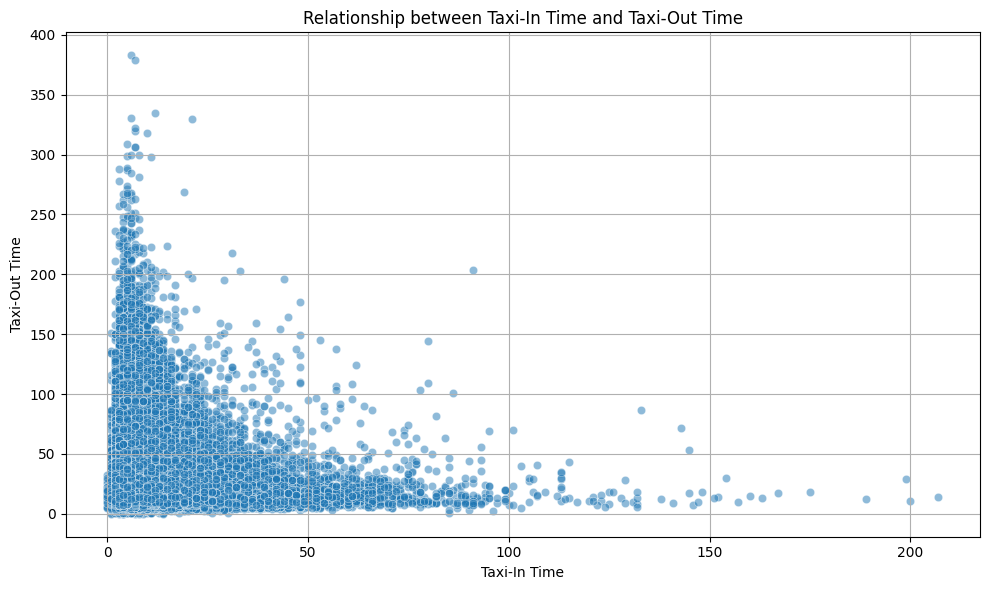

In [33]:
# Scatter plot for DepDelay vs ArrDelay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DepDelay', y='ArrDelay', data=df, alpha=0.5)
plt.title('Relationship between Departure Delay and Arrival Delay')
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot for Distance vs AirTime
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='AirTime', data=df, alpha=0.5)
plt.title('Relationship between Distance and Air Time')
plt.xlabel('Distance')
plt.ylabel('Air Time')
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot for TaxiIn vs TaxiOut
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TaxiIn', y='TaxiOut', data=df, alpha=0.5)
plt.title('Relationship between Taxi-In Time and Taxi-Out Time')
plt.xlabel('Taxi-In Time')
plt.ylabel('Taxi-Out Time')
plt.grid(True)
plt.tight_layout()
plt.show()

## Bivariate analysis - categorical vs. numerical

### Subtask:
Create box plots or violin plots, potentially grouped by the categorical feature, to compare the distribution of the numerical feature across different categories.


**Reasoning**:
Create box plots to visualize the distribution of 'ArrDelay' across different 'DayOfWeek', 'DepDelay' across different 'Month', and 'Distance' across different 'Airline'.



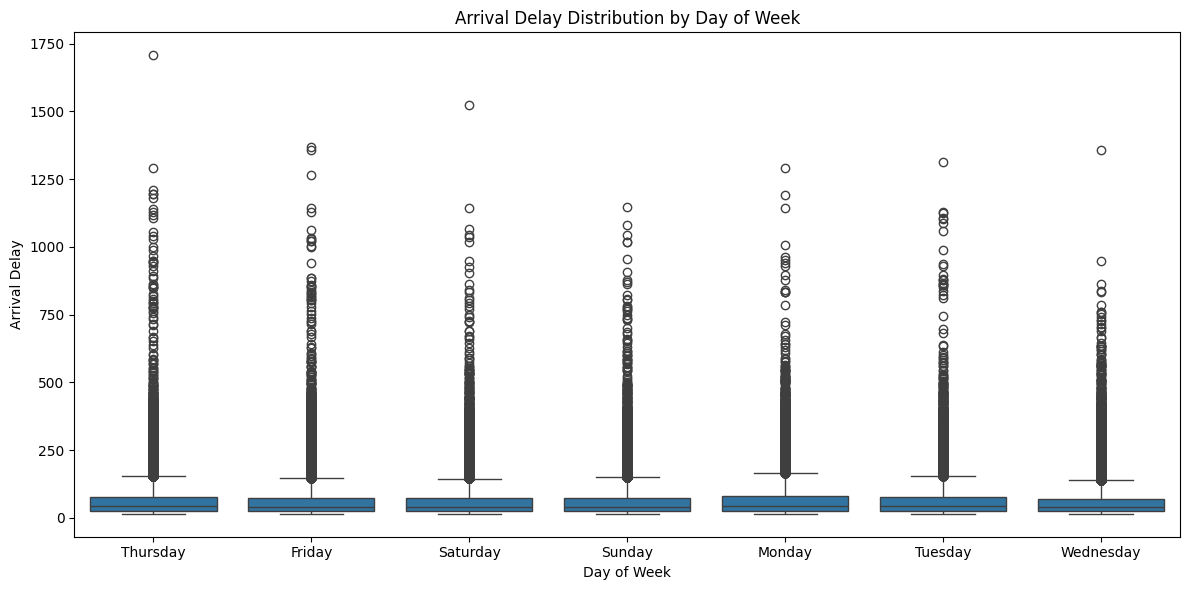

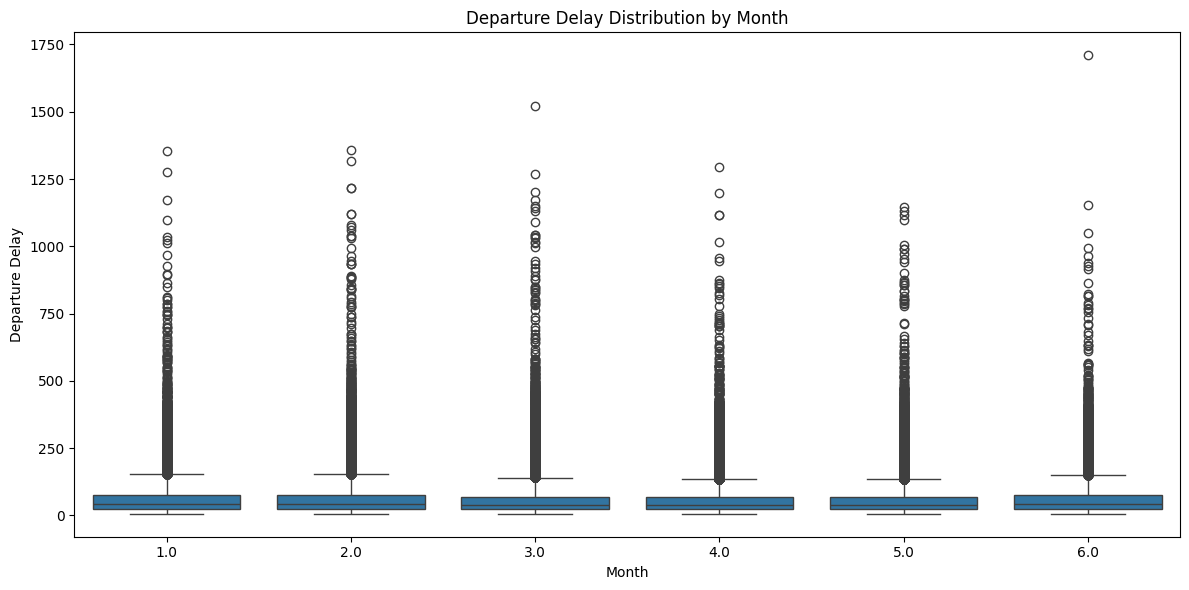

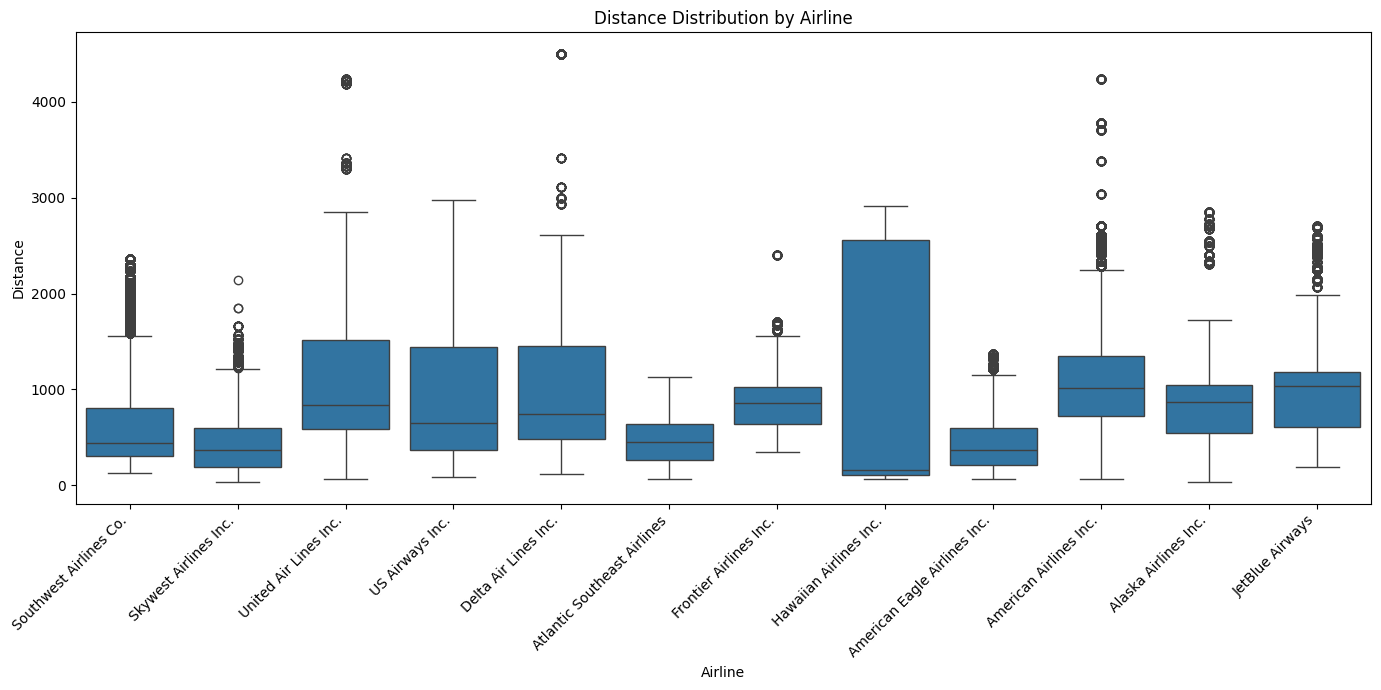

In [34]:
# Create a box plot to visualize the distribution of 'ArrDelay' across different 'DayOfWeek'.
plt.figure(figsize=(12, 6))
sns.boxplot(x='DayOfWeek', y='ArrDelay', data=df)
plt.title('Arrival Delay Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Arrival Delay')
plt.tight_layout()
plt.show()

# Create a box plot to visualize the distribution of 'DepDelay' across different 'Month'.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='DepDelay', data=df)
plt.title('Departure Delay Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Departure Delay')
plt.tight_layout()
plt.show()

# Create a box plot to visualize the distribution of 'Distance' across different 'Airline'.
plt.figure(figsize=(14, 7))
sns.boxplot(x='Airline', y='Distance', data=df)
plt.title('Distance Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Distance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The most frequent cancellation code is 'B'.
*   The distribution of numerical features like `ArrDelay`, `DepDelay`, `Distance`, `TaxiIn`, and `TaxiOut` are right-skewed, indicating the presence of outliers.
*   Most cancellations are associated with cancellation code 'B' across all days of the week and months.
*   There is a strong positive linear relationship between `DepDelay` and `ArrDelay`, and between `Distance` and `AirTime`.
*   There is a positive correlation between `TaxiIn` and `TaxiOut` times.
*   The distribution of arrival delays varies across different days of the week, and departure delays vary across different months.
*   The distribution of flight distances varies significantly across different airlines.

### Insights or Next Steps

*   Further investigation into the reasons behind the high frequency of cancellation code 'B' is needed to understand and potentially mitigate the causes of these cancellations.
*   Given the presence of outliers in several numerical features, consider applying data cleaning techniques or using robust statistical methods in future analyses.
